<a href="https://colab.research.google.com/github/Miranda-Merino-Irigoyen-Jorge-Missael/Simulaci-n-2/blob/main/Metropolis_Hastings_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


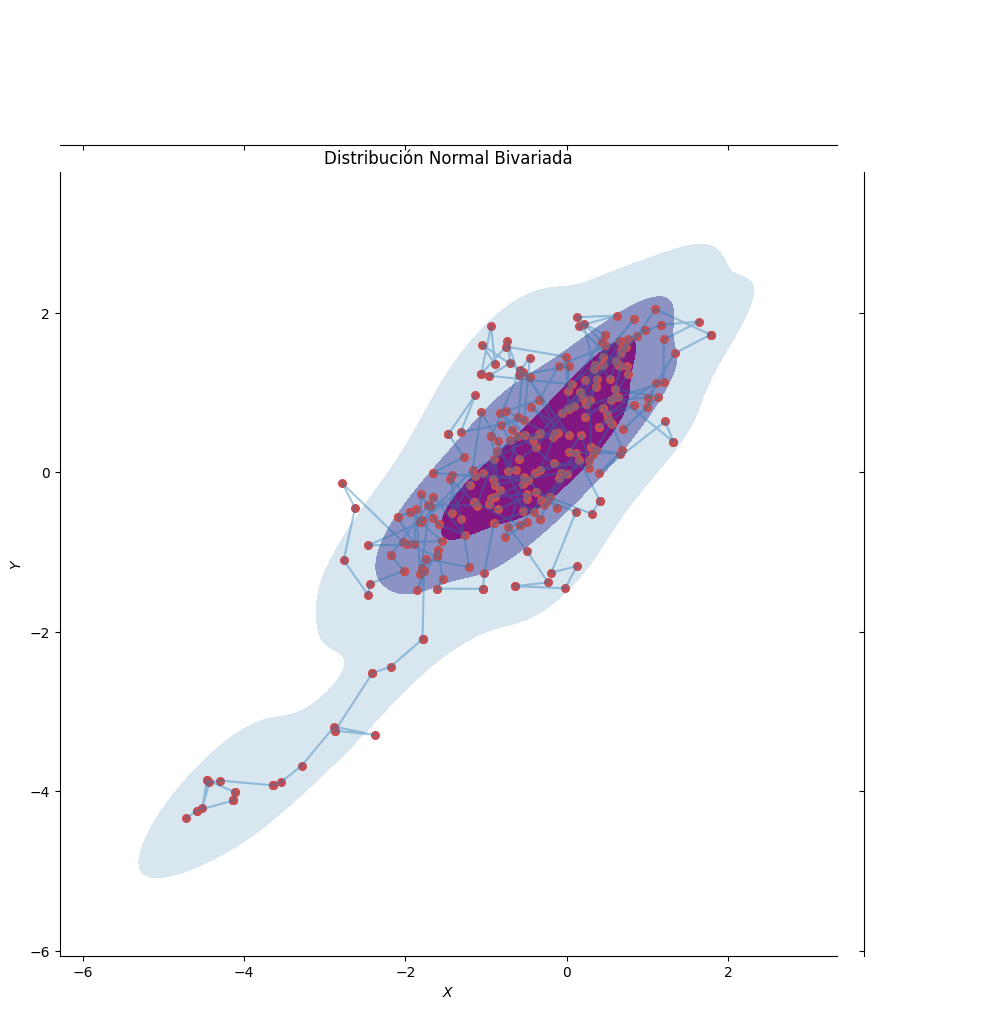

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


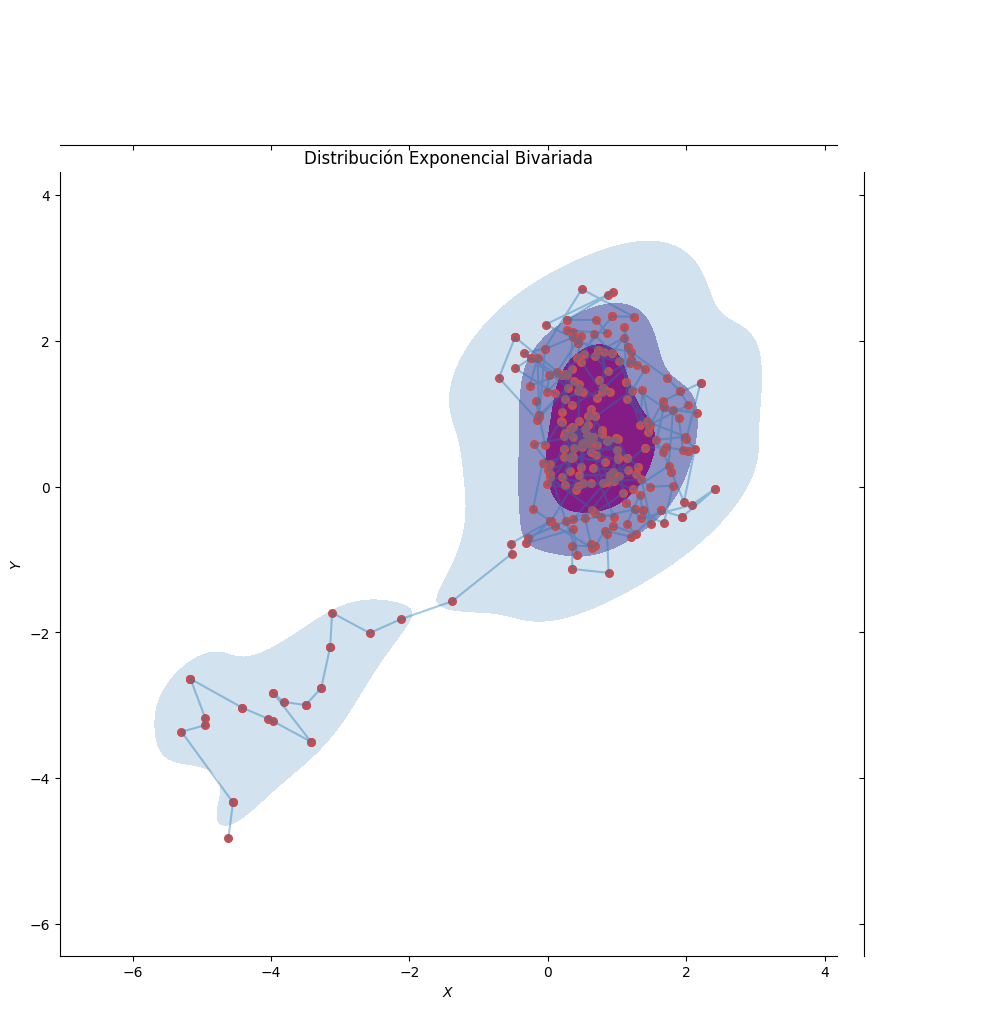

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


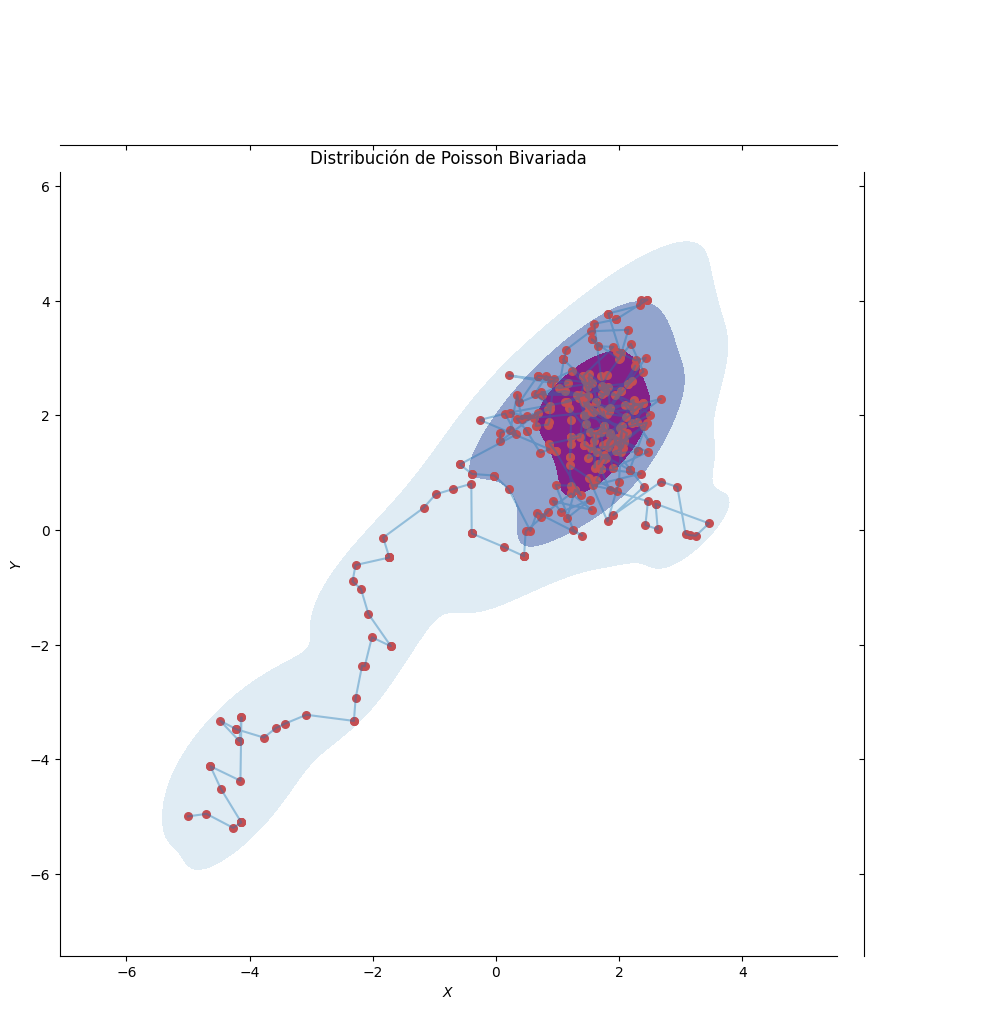

In [4]:
# Importamos las librerías necesarias
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Función para calcular una distribución normal bivariada
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Distribución normal bivariada.
    """
    Xmu = X - mux
    Ymu = Y - muy
    rho = sigmaxy / (sigmax * sigmay)
    z = Xmu**2 / sigmax**2 + Ymu**2 / sigmay**2 - 2 * rho * Xmu * Ymu / (sigmax * sigmay)
    denom = 2 * np.pi * sigmax * sigmay * np.sqrt(1 - rho**2)
    return np.exp(-z / (2 * (1 - rho**2))) / denom

# Función para graficar la distribución conjunta y los puntos generados
def plot_dist(x, y, title):
    ''' Entorno de visualización para graficar las distribuciones. '''
    sns.set_style('white')
    plt.rcdefaults()

    # Contorno de la distribución
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # Añadimos un gráfico de dispersión con los datos generados
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4)

    # Etiquetas de los ejes y título
    g.set_axis_labels("$X$", "$Y$")
    plt.title(title)
    plt.show()

# Función para implementar el algoritmo de Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step):
    ''' Algoritmo de Metropolis-Hastings para generar muestras. '''
    x = x0
    y = y0

    # Inicializamos la lista de muestras con ceros
    points = np.zeros((n, 2))

    # Iteramos para generar n muestras
    for i in range(n):
        # Proponemos nuevos valores para el estado actual mediante el muestreo
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Guardamos los puntos generados
        points[i] = np.array([x, y])

    return points

# 1. Distribución Normal Bivariada
mean_normal = np.array([0, 1])  # Media
var_normal = np.array([[1, .5], [.5, 1]])  # Matriz de covarianza

# Función objetivo para la distribución normal bivariada
def ptarget_normal(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean_normal, cov=var_normal)

# Generamos muestras de la distribución normal bivariada
samples_normal = metropolis_hastings(ptarget_normal, 300, -5, -5, 0.4)
# Graficamos la distribución
plot_dist(samples_normal[:, 0], samples_normal[:, 1], "Distribución Normal Bivariada")

#########################
# 2. Distribución Exponencial Bivariada
mean_exp = np.array([1, 1])
var_exp = np.array([[1, 0.3], [0.3, 1]])

# Función objetivo para la distribución exponencial bivariada
def ptarget_exp(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean_exp, cov=var_exp)

# Generamos muestras de la distribución exponencial bivariada
samples_exp = metropolis_hastings(ptarget_exp, 300, -5, -5, 0.4)
# Graficamos la distribución
plot_dist(samples_exp[:, 0], samples_exp[:, 1], "Distribución Exponencial Bivariada")

#########################
# 3. Distribución de Poisson Bivariada
mean_poisson = np.array([2, 2])
var_poisson = np.array([[1, 0.2], [0.2, 1]])

# Función objetivo para la distribución de Poisson bivariada
def ptarget_poisson(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean_poisson, cov=var_poisson)

# Generamos muestras de la distribución de Poisson bivariada
samples_poisson = metropolis_hastings(ptarget_poisson, 300, -5, -5, 0.4)
# Graficamos la distribución
plot_dist(samples_poisson[:, 0], samples_poisson[:, 1], "Distribución de Poisson Bivariada")
